<a href="https://colab.research.google.com/github/simpleParadox/PSYCO-576-Fall-2020/blob/master/PSYCO_576_ML_for_Psychology_DW_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Welcome to the Fourth Data Workshop!**

Good job on the third data workshop, we learned a lot there.

To recap, here's what we learned in the third data workshop. We learned about cross-validation, its different types, and touched on retrieving features using PCA.

In this notebook, we will take a slight detour and focus on one of the machine learning models, particularly SVM and implement a high level neural network.

In this workshop, we will use scikit-learn and use the SVM package from it. We will look at how varying varying different hyperparameters of the model have an effect on the output.

We will look at a simple example of using SVM on recognizing hand-written digits. We will use this dataset because it is easily available in existing machine learning packages and can be extended to brain imaging data (also this eliminates focussing more on preprocessing the brain imaging data).

In [1]:
# First let's load the packages.
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Section 1

Now let's load the digits.

In [2]:
digits = datasets.load_digits()  

In [3]:
X, y = digits.images, digits.target

The image data and the target values are stored in variables X and y.

In [4]:
X.shape

(1797, 8, 8)

In [5]:
y.shape

(1797,)

Let's look at one of the images.

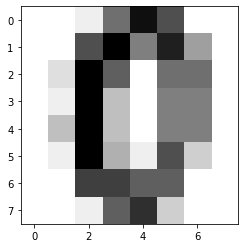

In [6]:
plt.imshow(X[10], cmap=plt.cm.gray_r, interpolation='nearest')

As we can see, the resolution is not so high. Since this is a toy example, it's fine for our needs.

What image do you see? 🤔

In [ ]:
y[10]

0

Likewise, we have 1797 images of low-resolution hand wirtten digits. This also means that the image data is in the form of a 3-d matrix. Though this shouldn't be a problem and we can use a vectorizer to solve this, it will be more simple if we just reshape the 3-d matrix into a 2-d matrix.

###Exercise 1
Reshape the input data into a 2-d matrix.

HINT: Use [np.reshape](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html)

In [ ]:
X = ...  # Fill this out.

In [7]:
#@title Solution
X = np.reshape(X, (len(X),-1))

Now let's split our dataset into training and testing dataset.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

Now let's initialize our SVM model with default parameters.

In [ ]:
svc = SVC()  

Let's train the model.

In [ ]:
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
svc.score(X_test, y_test)

0.9972222222222222

That score is really high! Let's do cross-validation to get a more robust estimate.

In [ ]:
from sklearn.model_selection import ShuffleSplit
svc = SVC()
iters = 10
scores = []
sf = ShuffleSplit(n_splits=iters, test_size=0.20)
for train_index, test_index in sf.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  svc.fit(X_train, y_train)
  scores.append(svc.score(X_test, y_test))

print(f"Average Monte Carlo Cross Validation for {iters} iterations is: ", np.mean(scores))


Average Monte Carlo Cross Validation for 10 iterations is:  0.9886111111111111


Now let's see if we can improve the accuracy by tuning the hyperparameters.

From the last data workshop, we will use the ideas of GridSearchCV to find optimal hyperparameters.

In [ ]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV
svc = SVC()
# Define parameters
iters = 2
svc_params = {'C': [0.01, 0.1, 10, 100, 1000], 'kernel': ['rbf', 'sigmoid']}
sf = ShuffleSplit(n_splits=iters, test_size=0.20)
clf = GridSearchCV(svc, svc_params, cv=5, verbose=1)
for train_index, test_index in sf.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  clf.fit(X_train, y_train)
  scores.append(clf.score(X_test, y_test))
  print("Best params: ", clf.best_params_)

print(f"Average Monte Carlo Cross Validation for {iters} iterations is: ", np.mean(scores))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    8.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best params:  {'C': 10, 'kernel': 'rbf'}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best params:  {'C': 10, 'kernel': 'rbf'}
Average Monte Carlo Cross Validation for 2 iterations is:  0.9897058823529411


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    8.6s finished


Although the accuracy is high for our dataset, we still want to have a look at the confusion matrix to understand how the classifier is performing.

First let's create a training and testing and initialize a model with best parameters from our GridSearchCV.

In [8]:
model = SVC(kernel='rbf', C=10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
model.fit(X_train, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

###Exercise 2

Create a confusion matrix.

HINT: Use scikit-learn's [plot_confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html) function.

In [ ]:
# Import and create a confusion matrix using the above model.
...


In [ ]:
#@title Solution
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test)

## Section 2

In this section we are going to look at an implementation of a neural network.

For this notebook, we are going to use [Keras](https://keras.io/) which is a high-level API to build neural networks. Keras is great for small scale projects and quick experimentation. But large scale projects usually use PyTorch or TensorFlow.

You can decide to use any library you want, the architecture of the network is independent of the library.

NOTE: Keras runs on top of TensorFlow and keras can be accessed via TensorFlow.

In [11]:
# Import classes.
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [13]:
y_test[1]

0

In [14]:
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [15]:
y_train[1]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [30]:
# Now let's create the neural network and add layers.
model = Sequential()
model.add(tf.keras.Input(shape=(64,)))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=num_classes, activation='softmax'))

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
model.fit(X_train, y_train, epochs=2, batch_size=10)

Epoch 1/2
144/144 [==============================] - 0s 965us/step - loss: 0.9397 - accuracy: 0.7606
Epoch 2/2
144/144 [==============================] - 0s 941us/step - loss: 0.2509 - accuracy: 0.9241


###Exercise 3
Evaluate the performance of the model on the test data.
HINT: Read on this method to see how it's used: [Evaluate](https://keras.io/api/models/model_training_apis/#evaluate-method)


In [20]:
score = ...
print("Neural Network Score: ", ...)

In [ ]:
#@title Solution
score = model.evaluate(X_test, y_test)
print("Test Accuracy: ", score[1])

##RNNs
Now we will look at a simple implementation of an RNN to predict time-series data.

NOTE: Input to neural networks have to be in a numerical format - for example, matrices of real numbers. So if the dataset contains strings/characters, they must be vectorized/converted to a numerical format.

In [34]:
from keras.layers import Dense, SimpleRNN

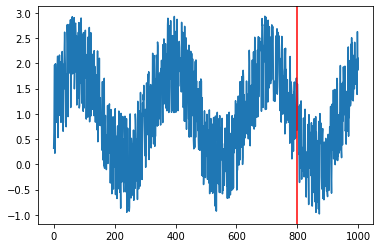

[0.67658492 0.67658492]


In [82]:
#@title Run this cell to create sample data.
def convertToMatrix(data, step):
 X, Y =[], []
 for i in range(len(data)-step):
  d=i+step  
  X.append(data[i:d,])
  Y.append(data[d,])
 return np.array(X), np.array(Y)

seq_len = 4
N = 1000    
Tp = 800

t=np.arange(0,N)
x=np.sin(0.02*t)+2*np.random.rand(N)
df = pd.DataFrame(x)
# print(df.head())

plt.plot(df)
plt.axvline(x=Tp, color='r')
plt.show()

values=df.values
train,test = values[0:Tp,:], values[Tp:N,:]
print(np.repeat(train[-1],2))

# add seq_len elements into train and test
test = np.append(test,np.repeat(test[-1,],seq_len))
train = np.append(train,np.repeat(train[-1,],seq_len))
# print(train)

# NOTE: RNN requires a 3-d input.
X_train, y_train = convertToMatrix(train,seq_len)
X_test, y_test = convertToMatrix(test,seq_len)
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

Now let's create our RNN model

In [83]:
model = Sequential()
model.add(SimpleRNN(units=64, input_shape=(1,seq_len), activation="relu"))
model.add(Dense(16, activation="relu")) 
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='sgd')

After creating the model, let's train it.

In [84]:
model.fit(X_train,y_train, epochs=100, verbose=0)
train_preds = model.predict(X_train)
test_preds= model.predict(X_test)
predicted=np.concatenate((train_preds, test_preds),axis=0)


And then let's plot the overlay of our model's prediction on the true data.

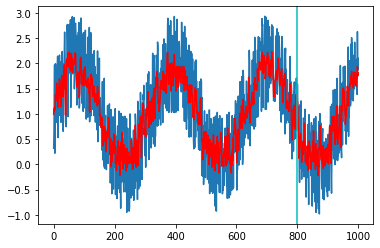

In [85]:
index = df.index.values
plt.plot(index,df.values)
plt.plot(index,predicted, c='r')
plt.axvline(df.index[Tp], c="c")
plt.show() 